In [3]:
import numpy as np

In [4]:
data=np.loadtxt('data.csv',delimiter=',')

In [5]:
import matplotlib.pyplot as plt

In [7]:
x,y=[data[:,0], data[:,1]]

In [8]:
x.shape

(100L,)

In [9]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x,y)

In [10]:
from sklearn.linear_model import LinearRegression as LR

In [11]:
alg1=LR()

In [12]:
alg1.fit(X_train.reshape(-1,1),Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
alg1.coef_
alg1.intercept_

13.501478153779146

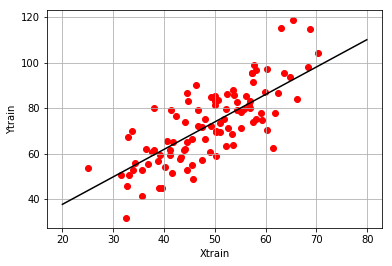

In [14]:
plt.scatter(x,y,color='red')
plt.xlabel('Xtrain')
plt.ylabel('Ytrain')
plt.grid()

m=alg1.coef_[0]
c=alg1.intercept_

x_line=np.arange(20,80,0.1)
y_line=m*x_line+c
plt.plot(x_line,y_line,color='black')


plt.show()

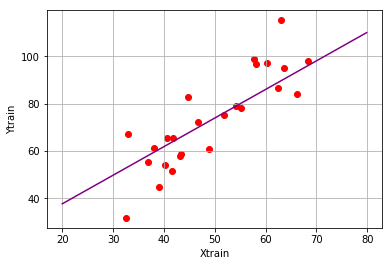

In [15]:
plt.scatter(X_test,Y_test,color='red')
plt.xlabel('Xtrain')
plt.ylabel('Ytrain')
plt.grid()

m=alg1.coef_[0]
c=alg1.intercept_

x_line=np.arange(20,80,0.1)
y_line=m*x_line+c
plt.plot(x_line,y_line,color='purple')


plt.show()

In [16]:
y_pred=X_test*m+c
ymean=y_pred.mean()
ymean_arr=np.zeros(y_pred.shape)
ymean_arr
ymean_arr[:]=ymean
ymean_arr**2

array([ 5329.60722134,  5329.60722134,  5329.60722134,  5329.60722134,
        5329.60722134,  5329.60722134,  5329.60722134,  5329.60722134,
        5329.60722134,  5329.60722134,  5329.60722134,  5329.60722134,
        5329.60722134,  5329.60722134,  5329.60722134,  5329.60722134,
        5329.60722134,  5329.60722134,  5329.60722134,  5329.60722134,
        5329.60722134,  5329.60722134,  5329.60722134,  5329.60722134,
        5329.60722134])

In [17]:
score=1-sum((Y_test-y_pred)**2)/sum((Y_test-ymean_arr)**2)

In [18]:
print score

print alg1.score(X_test.reshape(-1,1),Y_test)
print alg1.score(X_train.reshape(-1,1),Y_train)


0.697062143633
0.696972249008
0.537571733952


In [28]:
#implementing my own cost function cum linear regression model using normal equations

#for 1 d data

x1=X_train
y1=Y_train

slope=((x1*y1).mean()-(y1.mean()*x1.mean()))/((x1**2).mean()-x1.mean()*x1.mean())
intercept=y1.mean()-slope*x1.mean()

In [39]:
w=np.array([1,2,3])
v=np.array([1,2,3])
w**2


array([1, 4, 9])

In [45]:
#defining and doing work in functions helps create usable boxes of code

def fit(x1,y1):
    slope=((x1*y1).mean()-(y1.mean()*x1.mean()))/((x1**2).mean()-x1.mean()*x1.mean())
    intercept=y1.mean()-slope*x1.mean()
    return [slope,intercept]

def predict(x,m,c):
    predictedY=m*x+c
    return predictedY

def CD(ypred,ytrue):
    mymean=ytrue.mean()
    score=1-(sum((ytrue-ypred)**2)/sum((ytrue-mymean)**2))
    return score

def cost(y1,y2):
    myCost=sum((y1-y2)**2)
    return myCost

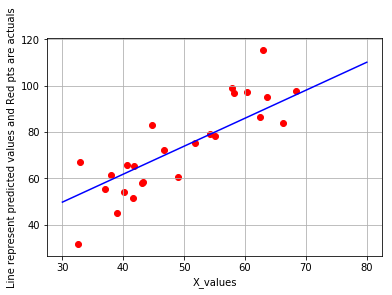

0.696972249008


In [41]:
#lets predict on the test data:

#Method 1, by graph
myX=np.linspace(30,80,100)
myY=slope*myX+intercept
plt.plot(myX,myY,'b')
plt.xlabel('X_values')
plt.ylabel('Line represent predicted values and Red pts are actuals')
plt.grid()

plt.scatter(X_test,Y_test,color='red')
plt.show()


#Method 2, by score
ypred=slope*X_test+intercept
mymean=Y_test.mean()
'''temp=np.zeros(Y_test.shape)
temp=temp+mymean
mymean=temp'''

score=1-(sum((Y_test-ypred)**2)/sum((Y_test-mymean)**2))
print score

In [48]:
#using functions created in blocks
[m,c]=fit(X_train,Y_train)

ypred=predict(X_test,m,c)
ypred_train=predict(X_train,m,c)
print CD(ypred,Y_test)
print CD(ypred_train,Y_train)

0.696972249008
0.537571733952


In [36]:
temp=np.array([1,2,3])
temp+1


array([2, 3, 4])